## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [2]:
from sklearn import datasets,metrics

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [9]:
#原始決策樹預設參數狀況

iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.01796599 0.05992368 0.92211033]


In [48]:
#嘗試修改參數

train_x, test_x,train_y,test_y = train_test_split(iris.data,iris.target,test_size=0.25,random_state=4)
# criterion預設'gini'=CART; 'entropy'=ID3,C4.5  <這邊發現entropy跟gini結果同
# max_depth 最大深度 預設是不管 <其實樣本數少或特徵少可以不管 避免overfitting
# min_samples_split 要做切割的最小樣本數 預設是2 ;如果樣本小可以不管
# min_samples_leaf 最小葉子樣本數 預設是1
# max_leaf_nodes 最大葉子數 預設不限制; 當特徵多時可以使用,避免overfitting
# class_weight 預設為None ; balanced可避免樣本都偏向某一分類
dct = DecisionTreeClassifier(criterion='entropy',max_depth=5,
                             min_samples_split=10,min_samples_leaf=5,max_leaf_nodes=7,class_weight='balanced') 
dct.fit(train_x,train_y)
y_pd = dct.predict(test_x)

print("Acuuracy: ", metrics.accuracy_score(test_y, y_pd))
print(iris.feature_names)
print("Feature importance: ", dct.feature_importances_)

Acuuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.01596939 0.         0.66516644 0.31886417]


In [31]:
# 匯入資料boston 連續型
bos = datasets.load_boston()
bos

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [51]:
#這邊boston是利用迴歸樹
tra_x,te_x,tra_y,te_y = train_test_split(bos.data,bos.target,test_size=0.2,random_state=5)
dec_b = DecisionTreeRegressor().fit(tra_x,tra_y)
#預測
pred_y_bos = dec_b.predict(te_x)

#連續型是用MSE
print("MSE: ", metrics.mean_squared_error(te_y,pred_y_bos))
print(iris.feature_names)
print("Feature importance: ", dec_b.feature_importances_)

MSE:  29.34725490196078
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [5.37932579e-02 1.07582702e-03 2.84541966e-03 4.62478902e-05
 2.08534588e-02 5.56428896e-01 9.81640320e-03 9.63284380e-02
 1.02046290e-03 1.01691419e-02 1.37526138e-02 2.22642331e-02
 2.11605600e-01]


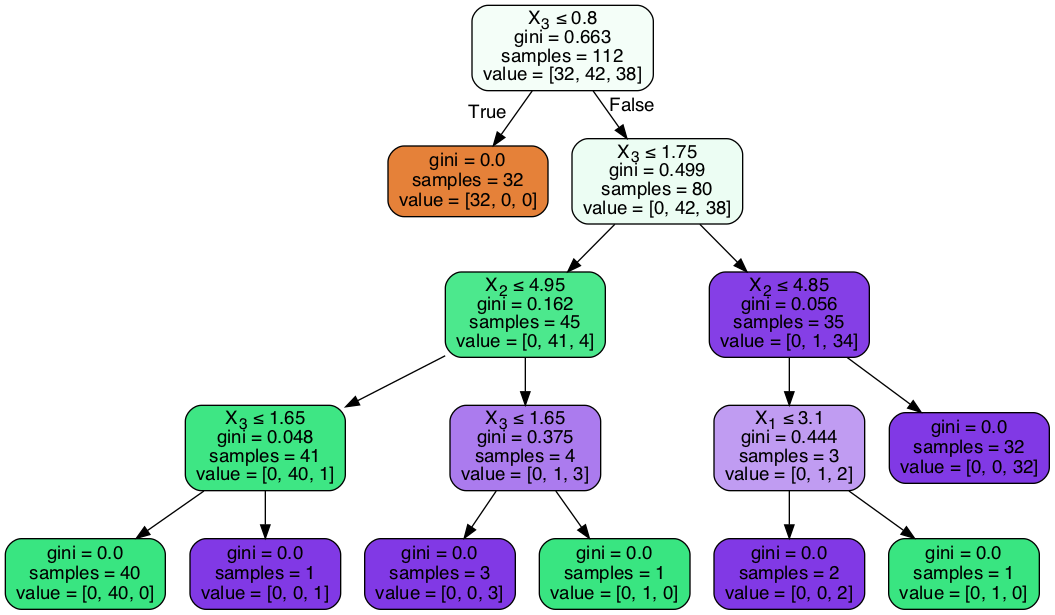

In [65]:
#視覺化

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz #graphviz 用anaconda的terminal安裝
import pydotplus  #這個須額外安裝
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [59]:
!pip install pydotplus

     |████████████████████████████████| 286kB 77kB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=5a6adab1700990b26d0f2c89aa608c662537830c454321c71c9013188531a2c5
  Stored in directory: /Users/adam/Library/Caches/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
